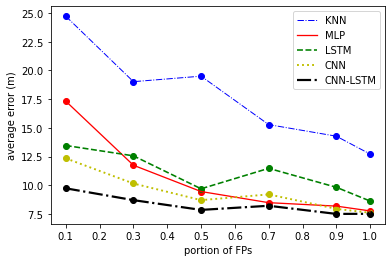

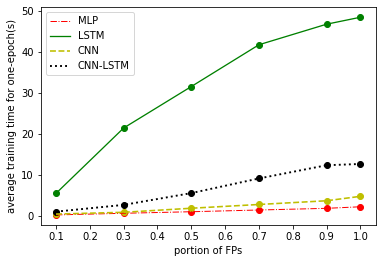

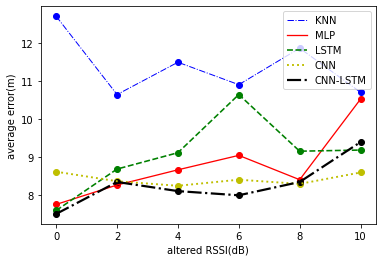

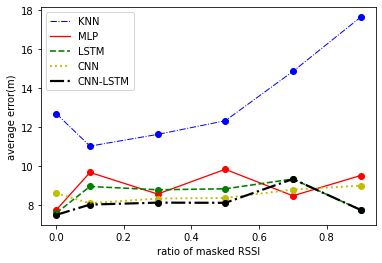

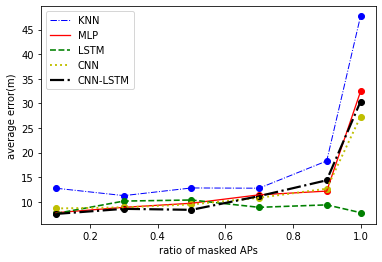

No handles with labels found to put in legend.


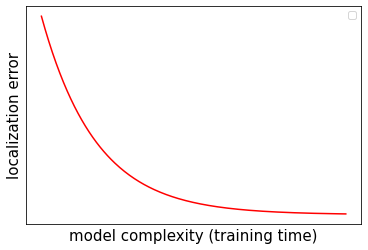

In [10]:
import numpy as np
from matplotlib import pyplot as plt

fp_density = [0.1,0.3,0.5,0.7,0.9,1.0]
legend = ['KNN','MLP','LSTM','CNN','CNN-LSTM']
line_style =  ['-.','-', '--', ':','-.']
line_width = [1, 1.3, 1.6, 1.9,2.2]
color = ['b','r','g','y','black']
knn = [24.72,19.02,19.50,15.28,14.27,12.71]
mlp = [17.32,11.74,9.45,8.48,8.18,7.76]
lstm = [13.46,12.56,9.69,11.47,9.82,8.62]
cnn = [12.34,10.15,8.70,9.20,7.94,7.60]
cnn_lstm = [9.73, 8.70,7.85,8.21,7.50,7.51]
errors = [knn,mlp, lstm,cnn,cnn_lstm]
plt.xlabel('portion of FPs')
plt.ylabel('average error (m)')
plt.xticks([i * 0.1 for i in range(11)])

for i in range(5):
    error = errors[i]
    plt.scatter(fp_density, error, color=color[i])
    plt.plot(fp_density, error, color=color[i], linestyle=line_style[i],linewidth= str(line_width[i]))
plt.legend(legend)

plt.savefig("error performance over fingerprint density")
plt.show()


plt.xlabel('portion of FPs')
plt.ylabel('average training time for one-epoch(s)')
plt.xticks([i * 0.1 for i in range(11)])
mlp_comp = [0.2,0.6,0.98,1.40,1.81, 2.19]
lstm_comp = [5.47,21.44,31.57,41.78,46.8,48.5]
cnn_comp = [0.41, 0.84, 1.83, 2.75, 3.66, 4.74]
cnn_lstm_comp = [1, 2.65, 5.53,9.11,12.34,12.65]
comps = [mlp_comp,lstm_comp,cnn_comp,cnn_lstm_comp]
for i in range(4):
    comp = comps[i]
    plt.scatter(fp_density, comp, color=color[i+1])
    plt.plot(fp_density, comp, color=color[i+1], linestyle=line_style[i],linewidth= str(line_width[i]))
plt.legend(legend[1:])

plt.savefig("everage training time for one-epoch over fingerprint density")
plt.show()


plt.xlabel('altered RSSI(dB)')
plt.ylabel('average error(m)')
plt.xticks([i * 2 for i in range(6)])
altered_rssi = [i * 2 for i in range(6)]
knn = [12.71,10.65,11.50,10.91,11.87,10.71]
mlp = [7.76,8.27,8.67,9.05,8.41,10.53]
lstm = [7.60,8.69,9.12,10.65,9.16,9.19]
cnn = [8.62,8.37,8.25,8.41,8.30,8.60]
cnn_lstm = [7.51, 8.35,8.11,8.00,8.35,9.40]
errors = [knn,mlp, lstm,cnn,cnn_lstm]
for i in range(5):
    error = errors [i]
    plt.scatter(altered_rssi, error, color=color[i])
    plt.plot(altered_rssi, error, color=color[i], linestyle=line_style[i],linewidth= str(line_width[i]))
plt.legend(legend)

plt.savefig("everage error for altered RSSI")
plt.show()


plt.xlabel('ratio of masked RSSI')
plt.ylabel('average error(m)')
plt.xticks([i * 0.2 for i in range(6)])
masked_rssi_ratio = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
knn = [12.71,11.04,11.64,12.34,14.87,17.65]
mlp = [7.76,9.69,8.58,9.85,8.49,9.53]
lstm = [7.60,8.97,8.80,8.85,9.35,7.77]
cnn = [8.62,8.11,8.35,8.38,8.81,9.01]
cnn_lstm = [7.51, 8.04,8.14,8.13,9.35,7.77]
errors = [knn,mlp, lstm,cnn,cnn_lstm]
for i in range(5):
    error = errors [i]
    plt.scatter(masked_rssi_ratio, error, color=color[i])
    plt.plot(masked_rssi_ratio, error, color=color[i], linestyle=line_style[i],linewidth= str(line_width[i]))
plt.legend(legend)

plt.savefig("everage error for masked RSSI")
plt.show()

plt.xlabel('ratio of masked APs')
plt.ylabel('average error(m)')
plt.xticks([i * 0.2 for i in range(6)])
masked_ap_ratio = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
knn = [12.73,11.23,12.79,12.74,18.28,47.71]
mlp = [7.76,8.85,9.68,11.39,12.15,32.41]
lstm = [7.60,10.12,10.34,8.85,9.35,7.77]
cnn = [8.62,8.85,9.44,10.79,12.64,27.30]
cnn_lstm = [7.51, 8.54,8.34,11.13,14.35,30.37]
errors = [knn,mlp, lstm,cnn,cnn_lstm]
for i in range(5):
    error = errors [i]
    plt.scatter(masked_ap_ratio, error, color=color[i])
    plt.plot(masked_ap_ratio, error, color=color[i], linestyle=line_style[i],linewidth= str(line_width[i]))
plt.legend(legend)

plt.savefig("everage error for masked RSSI")
plt.show()

from scipy.optimize import curve_fit
import numpy as np
# define type of function to search
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

# sample data
x = np.array([399.75, 989.25, 1578.75, 2168.25, 2757.75, 3347.25, 3936.75, 4526.25, 5115.75, 5705.25])
y = np.array([109,62,39,13,10,4,2,0,1,2])

# curve fit
p0 = (1.,1.e-5,1.) # starting search koefs
opt, pcov = curve_fit(model_func, x, y, p0)
a, k, b = opt
# test result
x2 = np.linspace(250, 6000, 250)
y2 = model_func(x2, a, k, b)
fig, ax = plt.subplots()
ax.plot(x2, y2, color='r')
#ax.plot(x, y, 'bo', label='data with noise')
ax.legend(loc='best')

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}
plt.xlabel('model complexity (training time)',font2)
plt.ylabel('localization error',font2)
plt.xticks([])  # 去x坐标刻度
plt.yticks([])  # 去y坐标刻度
plt.savefig("pathological_curve")
plt.show()
    